In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

%matplotlib inline

C:\Users\gyans\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df = pd.read_csv("https://www.dropbox.com/s/qhf0ocdqb3gh7ni/logistic_regression.csv?dl=1") 
print(df.head())

   admit  gre   gpa  rank
0      0  380  3.61     3
1      1  660  3.67     3
2      1  800  4.00     1
3      1  640  3.19     4
4      0  520  2.93     4


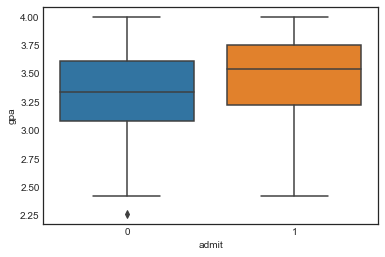

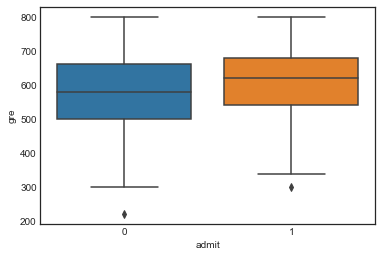

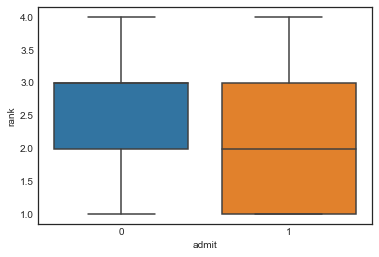

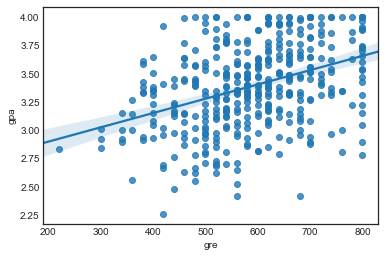

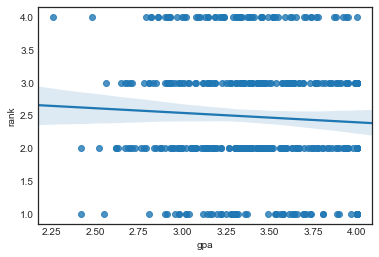

In [11]:
sns.set_style("white")

# Bivariate relationships of predictors to admissions outcome.
sns.boxplot(x="admit", y="gpa", data=df)
plt.show()
sns.boxplot(x="admit", y="gre", data=df)
plt.show()
sns.boxplot(x="admit", y="rank", data=df)
plt.show()

# Relationship between predictors.
sns.regplot(x='gre', y='gpa', data=df)
plt.show()
sns.regplot(x='gpa', y='rank', data=df)
plt.show()


In [3]:
# Declare predictors.
X_statsmod = df.loc[:,['gre', 'gpa','rank']]

# The Statsmodels formulation requires a column with constant value 1 that
# will act as the intercept.
X_statsmod['intercept'] = 1 

# Declare and fit the model.
logit = sm.Logit(df['admit'], X_statsmod)
result = logit.fit()

# Lots of information about the model and its coefficients, but the
# accuracy rate for predictions is missing.
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.574302
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      396
Method:                           MLE   Df Model:                            3
Date:                Mon, 07 May 2018   Pseudo R-squ.:                 0.08107
Time:                        09:19:31   Log-Likelihood:                -229.72
converged:                       True   LL-Null:                       -249.99
                                        LLR p-value:                 8.207e-09
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
gre            0.0023      0.001      2.101      0.036       0.000       0.004
gpa            0.7770      0.

In [4]:
# Calculate accuracy. First, get probability that each row will be admitted.
pred_statsmod = result.predict(X_statsmod)

# Code admission as 1 if probability is greater than .5.
pred_y_statsmod = np.where(pred_statsmod < .5, 0, 1)

# Accuracy table.
table = pd.crosstab(df['admit'], pred_y_statsmod)

print('\n Accuracy by admission status')
print(table)
print('\n Percentage accuracy')
print((table.iloc[0,0] + table.iloc[1,1]) / (table.sum().sum()))


 Accuracy by admission status
col_0    0   1
admit         
0      253  20
1       98  29

 Percentage accuracy
0.705


In [5]:
# Declare a logistic regression classifier.
# Parameter regularization coefficient C described above.
lr = LogisticRegression(C=1e9)
y = df['admit']
X = df[['gpa', 'gre','rank']]

# Fit the model.
fit = lr.fit(X, y)

# Display.
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_y_sklearn = lr.predict(X)

print('\n Accuracy by admission status')
print(pd.crosstab(pred_y_sklearn, y))

print('\n Percentage accuracy')
print(lr.score(X, y))

Coefficients
[[ 0.72073913  0.0022333  -0.56204415]]
[-3.21221131]

 Accuracy by admission status
admit    0   1
row_0         
0      255  99
1       18  28

 Percentage accuracy
0.7075


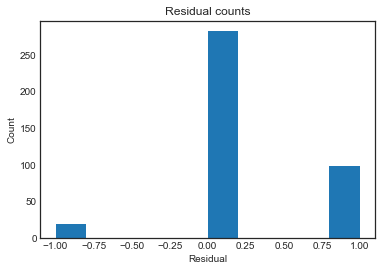

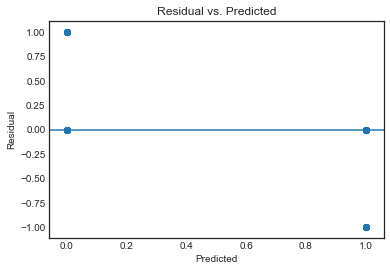

In [146]:
residual = y - pred_y_sklearn

plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()
plt.scatter(pred_y_sklearn, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [28]:
for c in np.arange(-10, 10 , dtype=float):
    lr = LogisticRegression(C=10**c, random_state=0)
    lr.fit(X, y)
    print('C Value {} Percentage accuracy {}'.format(10**c,lr.score(X, y) ))
    

C Value 1e-10 Percentage accuracy 0.6825
C Value 1e-09 Percentage accuracy 0.6825
C Value 1e-08 Percentage accuracy 0.6825
C Value 1e-07 Percentage accuracy 0.6825
C Value 1e-06 Percentage accuracy 0.6825
C Value 1e-05 Percentage accuracy 0.6825
C Value 0.0001 Percentage accuracy 0.6825
C Value 0.001 Percentage accuracy 0.6825
C Value 0.01 Percentage accuracy 0.6825
C Value 0.1 Percentage accuracy 0.7025
C Value 1.0 Percentage accuracy 0.71
C Value 10.0 Percentage accuracy 0.7025
C Value 100.0 Percentage accuracy 0.7075
C Value 1000.0 Percentage accuracy 0.705
C Value 10000.0 Percentage accuracy 0.705
C Value 100000.0 Percentage accuracy 0.705
C Value 1000000.0 Percentage accuracy 0.705
C Value 10000000.0 Percentage accuracy 0.705
C Value 100000000.0 Percentage accuracy 0.705
C Value 1000000000.0 Percentage accuracy 0.7075


# Let's standardise the dataset.

In [29]:
X_std = pd.DataFrame(StandardScaler().fit_transform(X), columns = X.columns)

In [30]:
X_std.shape

(400, 3)

In [41]:
for c in np.arange(-10, 10 , dtype=float):
    lr = LogisticRegression(C=10**c, random_state=1)
    lr.fit(X_std, y)
    print('C Value {} Percentage accuracy {}'.format(10**c,lr.score(X_std, y) ))
    

C Value 1e-10 Percentage accuracy 0.7
C Value 1e-09 Percentage accuracy 0.7
C Value 1e-08 Percentage accuracy 0.7
C Value 1e-07 Percentage accuracy 0.7
C Value 1e-06 Percentage accuracy 0.7
C Value 1e-05 Percentage accuracy 0.7
C Value 0.0001 Percentage accuracy 0.7
C Value 0.001 Percentage accuracy 0.7025
C Value 0.01 Percentage accuracy 0.71
C Value 0.1 Percentage accuracy 0.705
C Value 1.0 Percentage accuracy 0.705
C Value 10.0 Percentage accuracy 0.705
C Value 100.0 Percentage accuracy 0.705
C Value 1000.0 Percentage accuracy 0.705
C Value 10000.0 Percentage accuracy 0.705
C Value 100000.0 Percentage accuracy 0.705
C Value 1000000.0 Percentage accuracy 0.705
C Value 10000000.0 Percentage accuracy 0.705
C Value 100000000.0 Percentage accuracy 0.705
C Value 1000000000.0 Percentage accuracy 0.705


Here we found that the accuracy is maximum at C value of 0.01. We can consider this C value in further cases.

0.702076297686


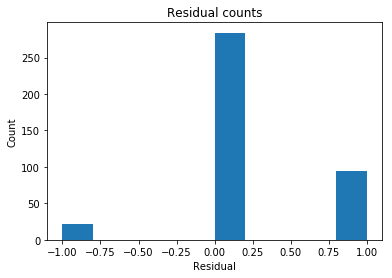

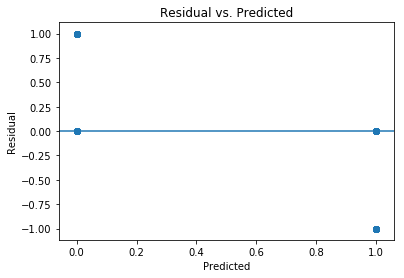

In [55]:
lr = LogisticRegression(C= 0.01, random_state=1)
lr.fit(X_std, y)
score = cross_val_score(lr, X_std, y, cv=10)
print(score.mean())
pred_y_sklearn = lr.predict(X_std)
residual = y - pred_y_sklearn

plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()
plt.scatter(pred_y_sklearn, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [36]:
X_std.corr()

,gpa,gre,rank
gpa,1.000000,0.384266,-0.057461
gre,0.384266,1.000000,-0.123447
rank,-0.057461,-0.123447,1.000000


In [9]:
X['gre'].unique()

array([380, 660, 800, 640, 520, 760, 560, 400, 540, 700, 440, 480, 780,
       360, 500, 600, 680, 620, 580, 460, 740, 300, 720, 340, 420, 220], dtype=int64)

In [56]:
gre_dummies = pd.get_dummies(X_std['gre'],prefix='gre_')
X_3 = pd.concat([X_std,gre_dummies], axis=1)
X_3.drop('gre', axis=1, inplace=True)

In [57]:
X_3.head()

,gpa,rank,gre__-3.18708039696,gre__-2.49367155345,gre__-2.1469671317,gre__-1.97361492082,gre__-1.80026270995,gre__-1.62691049907,gre__-1.4535582882,gre__-1.28020607732,...,gre__0.279963820565,gre__0.453316031441,gre__0.626668242317,gre__0.800020453193,gre__0.973372664069,gre__1.14672487495,gre__1.32007708582,gre__1.4934292967,gre__1.66678150757,gre__1.84013371845
0,0.579072,0.545968,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.736929,0.545968,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1.605143,-1.574296,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,-0.525927,1.606100,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,-1.209974,1.606100,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
lr = LogisticRegression(C= 0.01, random_state=1)
score = cross_val_score(lr, X_3, y, cv=10)
print(score.mean())

0.724521575985


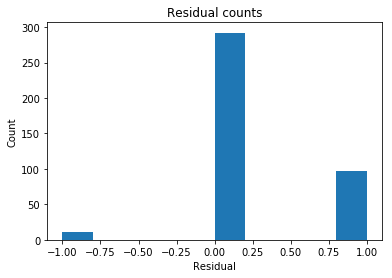

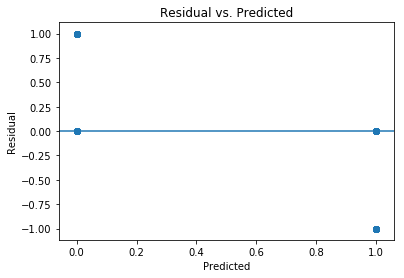

In [62]:
fit = lr.fit(X_3, y)
pred_y_sklearn = lr.predict(X_3)
residual = y - pred_y_sklearn

plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()
plt.scatter(pred_y_sklearn, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

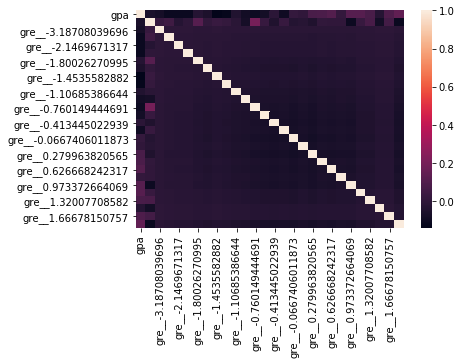

In [60]:
sns.heatmap(X_3.corr())
plt.show()

We got better results when we considered standardising the values and then creating dummies for gre column. The highest Accuracy observed in 72%